In [305]:
import numpy as np
import random
import math
import time
import pandas as pd
import matplotlib.pyplot as plt
import random
import copy
import functools
import decimal
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer
decimal.getcontext().prec = 64

In [306]:
def generate_uniform_points(a=(0, 0), b=(100, 0), c=(100, 100), d=(0, 100), n=100, prec = 1):
    random.seed()
    points = set()
    for i in range(n):
        while True:
            x = round(random.uniform(a[0],b[0]), prec)
            y = round(random.uniform(a[1],d[1]), prec)
            new_point = (x,y)
            if new_point not in points:
                points.add(new_point)
                break
    return list(points)


def even_circle_points(O, R, n, prec = 12):
    points=[]
    step = 1/n
    for i in range (n):
        t = step * i
        x = round(R*np.cos(t*np.pi*2) + O[0], prec)
        y = round(R*np.sin(t*np.pi*2) + O[1], prec)
        points.append((x,y))
    return points


def set_convex_hull(inside = 15, outside = 5, size_of_square = 20, O=(0,0), prec = 2):
    a = [-size_of_square/2+O[0], -size_of_square/2+O[1]]
    b = [size_of_square/2+O[0], -size_of_square/2+O[1]]
    c = [size_of_square/2+O[0], size_of_square/2+O[1]]
    d = [-size_of_square/2+O[0], size_of_square/2+O[1]]
    new_points=generate_uniform_points(a,b,c,d, inside, prec)
    new_points.extend(even_circle_points(O, size_of_square*1.5, outside, prec))
    new_points=random.sample(new_points,len(new_points))
    return new_points


def generate_rectangle_points(a=(-10, -10), b=(10, -10), c=(10, 10), d=(-10, 10), n=10**3):
    random.seed()
    points = set()
    edge = c[0]-a[0]
    for i in range (n):
        while True:
            dist=random.uniform(0,edge*4)
            if dist<edge:
                x=a[0]
                y=dist+a[1]
            elif dist<edge*2:
                x=dist-edge+d[0]
                y=d[1]
            elif dist<edge*3:
                x=b[0]
                y=dist-(edge*2)+b[1]
            else:
                x=dist-(edge*3)+a[0]
                y=a[1]
            new_point = (x,y)
            if new_point not in points:
                points.add(new_point)
                break
    return list(points)


In [307]:
def Start_point (Q):
    start=Q[0]
    start_idx=0
    for i in range (1,len(Q)):
        if Q[i][1]<start[1]:
            start=Q[i]
            start_idx=i
        elif Q[i][1]==start[1]:
            if Q[i][0]<start[0]:
                start=Q[i]
                start_idx=i
    return start,start_idx


def orientation (a,b,c,epsilon):
    if epsilon < 1e-10:
        # Występuje tu zamiana typu danych na dokładność do 64 liczb miejsc po przecinku
        a=(decimal.Decimal(a[0]),decimal.Decimal(a[1]))
        b=(decimal.Decimal(b[0]),decimal.Decimal(b[1]))
        c=(decimal.Decimal(c[0]),decimal.Decimal(c[1]))
    det=(b[0]-a[0])*(c[1]-b[1])-(b[1]-a[1])*(c[0]-b[0])
    if abs(det)<epsilon:
        return 0
    elif det>0:
        return 1
    else:
        return -1


def further (a,b,c):
    if a[0]==b[0]:
        if abs(a[1]-b[1])>abs(a[1]-c[1]):
            return True
        else:
            return False
    else:
        if abs(a[0]-b[0])>abs(a[0]-c[0]):
            return True
        else:
            return False


def ComparePoints_v2(start_point, first, second, epsilon):
    orient=orientation(start_point, first, second, epsilon)
    if orient>0 or (orient==0 and further(start_point, first, second)==False):
        return -1
    else:
        return 1
    

def Sort_points (Q,start,start_idx,epsilon):
    if len(Q)==1: return Q
    start_point = Q[start_idx]
    Q.pop(start_idx)    
    Q = sorted(Q, key = functools.cmp_to_key(lambda first, second: ComparePoints_v2(start_point, first, second, epsilon)))
    Q_sorted=[start_point]
    for i in range (len(Q)-1):
        if orientation(start_point,Q[i],Q[i+1], epsilon)!=0:
            Q_sorted.append(Q[i])
    Q_sorted.append(Q[len(Q)-1])
    return Q_sorted


def Get_convex_hull(Q,epsilon):
    convex_hull=[Q[0],Q[1],Q[2]]
    i=3
    t=2
    while i<len(Q):
        if orientation(convex_hull[t-1],convex_hull[t],Q[i],epsilon)>0:
            convex_hull.append(Q[i])
            t+=1
            i+=1
        else:
            convex_hull.pop()
            t-=1
    return convex_hull



def graham_algorithm(Q, epsilon = 1e-25, clockwise = False):
    points = copy.deepcopy(Q)
    start,start_idx=Start_point(points)
    points=Sort_points(points,start,start_idx,epsilon)
    if len(points)<3:
        convex_hull = points
    else:
        convex_hull = Get_convex_hull(points,epsilon)
    if clockwise == True:
        convex_hull.reverse()
    return convex_hull

In [308]:
def jarvis_algorithm(Q, steps = False):
    global count

    def orientation(p1, p2, p3):
        x1, y1, x2, y2, x3, y3 = *p1, *p2, *p3
        d = (y3-y2)*(x2-x1) - (y2-y1)*(x3-x2)
        if d > 0:
            return 1
        elif d < 0:
            return -1
        else:
            return 0
      

    def dist(p1, p2):
        x1, y1, x2, y2 = *p1, *p2
        return (y2-y1)**2 + (x2-x1)**2
  
    x_min, y_min = float('inf'), float('inf')
    for i in range(len(Q)):
        x, y = Q[i]
        y_min = min(y_min, y)
    hull = []    
    
    for i in range(len(Q)):
        x, y = Q[i]
        if(y == y_min):
            x_min = min(x_min, x)
        
    on_hull = (x_min, y_min)
    while True:
        count += 1
        hull.append(on_hull)
        if(steps):
            new_vis = draw_from_arr(hull, Q)
            new_vis.show()
        next_point = Q[0]
        for point in Q:
            count += 1
            o = orientation(on_hull, next_point, point)
            if next_point == on_hull or o == -1 or (o == 0 and dist(on_hull, point) > dist(on_hull, next_point)):
                next_point = point
        on_hull = next_point
        if on_hull == hull[0]:
            break
    return hull
    raise Exception("Unimplemented")
    
    
def add_perimeter(points, vis, col = "red"):
    n = len(points)
    for i in range(n-1):
        vis.add_line_segment([(points[i], points[i+1])], color = col)
    vis.add_line_segment([(points[-1], points[0])], color = col)
    
    
def further (a,b,c):
    if a[0]==b[0]:
        if abs(a[1]-b[1])>abs(a[1]-c[1]):
            return True
        else:
            return False
    else:
        if abs(a[0]-b[0])>abs(a[0]-c[0]):
            return True
        else:
            return False

    
def Orientation_v2(p1, p2, p3, epsilon = 0):
        x1, y1, x2, y2, x3, y3 = *p1, *p2, *p3
        d = (y3-y2)*(x2-x1) - (y2-y1)*(x3-x2)
        if d > 0:
            return 1
        elif d < 0:
            return -1
        else:
            return 0
        
def ComparePoints(p1, first, second, epsilon = 0):
    orient= Orientation_v2(p1, first, second, epsilon)
    if orient>0 or (orient==0 and further(p1, first, second)== True):
        # first is more to the right
        return 1
    else:
        return -1
        
        
def calc_orient(convex, p1,  x, n):
        return ComparePoints(p1, convex[x], convex[(x+1) % n]), ComparePoints(p1, convex[x], convex[(x-1) % n])

    
def draw_point(p1, convex, mid, vis):
    vis.add_point([convex[mid]], color = "lime")
    vis.add_line([(p1, convex[mid])], color = "lime")
    vis.show()
    return


def bin_search(p1, convex, vis, show = False):
        
        n = len(convex)
        l, r = 0, n//2
        INF = float('inf')
        count = 0
        
        """
        print("ROZMIAR OTOCZKI:", n)
        print("OTOCZKA:")
        print(convex)
        print(p1)
        
        if(n > 2 and n <= 10**3):
            vis.add_point(convex, color = "blue")
            vis.add_point([p1], color = "red")
            add_perimeter(convex, vis, "blue")
            vis.show()
        """
            
        while(True):
            
            l1, l2 = calc_orient(convex, p1, l, n) #odwracamy zeby latwiej sie liczylo - tak jakby katy byly liczbami
            r1, r2 = calc_orient(convex, p1, r, n)  #to samo
            l1, l2, r1, r2 = l1 * (-1), l2 * (-1), r1 * (-1), r2 * (-1)
            
            #if(count >= 10):
                #return INF, INF
            
            #print("COUNT:", count)
            #print(l, r)
            #print(l1, l2)
            #print(r1, r2)
            
            if(show):
                vis.add_point([convex[l]], color = "magenta")
                vis.add_point([convex[r]], color = "purple")
                vis.show()
            
            if(l1 < 0 and l2 < 0):
                #print("LEFT SIE ZGADZA")
                return l, INF

            if(r1 < 0 and r2 < 0):
                return r, INF

            #Przy kazdym z osobna wyznaczaniu mid trzeba zweryfikowac, czy nie jest on moze szukana styczna

            if(l1 < 0 and l2 > 0):

                if(r1 < 0 and r2 > 0):

                    #sprawdzac czy left czy right jest wczesniej w lancuchu malejacym i na tej podstawie wybierac czesc

                    orient_l_r = ComparePoints(p1, convex[l], convex[r])

                    #orient_l_r < 0 oznacza, że kąt dla r jest wiekszy

                    if(orient_l_r < 0): #jesli right jest "wyzej" wtedy zamieniamy kolejnosc, bo chcemy zeby: kat dla r < kat dla l
                        temp, l = l, r
                        r = temp

                    mid = (r + ((l-r) % n)//2 ) % n 
                    if(show):
                        draw_point(p1, convex, mid, vis)

                    #sprawdzamy czy mid nalezy do tego samego lancucha co l i r

                    mid1, mid2 = calc_orient(convex, p1, mid, n)
                    mid1, mid2 = mid1 * (-1), mid2 * (-1)

                    if(mid1 < 0 and mid2 < 0):
                        return mid, INF

                    if(mid1 < 0 and mid2 > 0):
                        orient_r_mid = ComparePoints(p1, convex[r], convex[mid])

                        if(orient_r_mid < 0):
                            l, r = r, mid

                        else:
                            l, r = mid, l

                    else:
                        l, r = mid, l

                elif(r1 > 0 and r2 < 0):

                    #idziemy w strone plusow,  ale potem dla mid trzeba sprawdzic
                    #w ktorym lancuchu sie znajdzie i na tej podstawie okreslac czy isc na (right, mid) czy (mid, left)
                    
                    mid = (r + ((l-r)% n)//2 ) % n
                    
                    if(show):
                        draw_point(p1, convex, mid, vis)

                    mid1, mid2 = calc_orient(convex, p1, mid, n)
                    mid1, mid2 = mid1 * (-1), mid2 * (-1)

                    if(mid1 < 0 and mid2 < 0):
                        return mid, INF

                    if(mid1 < 0 and mid2 > 0):
                        l, r = r, mid

                    else:
                        l, r = mid, l

                elif(r1 > 0 and r2 > 0):

                    #idziemy w strone plusow
                    #musimy sprawdzic w ktorym lancuchu  znajdzie sie mid
                    mid = (r + ((l-r) % n)//2 ) % n
                    
                    if(show):
                        draw_point(p1, convex, mid, vis)

                    mid1, mid2 = calc_orient(convex, p1, mid, n)
                    mid1, mid2 = mid1 * (-1), mid2 * (-1)

                    if(mid1 < 0 and mid2 < 0):
                        return mid, INF

                    if(mid1 < 0 and mid2 > 0):
                        l, r = r, mid

                    elif(mid1 > 0 and mid2 < 0):
                        l, r = mid, l
                        


            elif(l1 > 0 and l2 < 0):
                #print("JESTEM TU l rosnacy")

                if(r1 < 0 and r2 > 0):
                    #praktycznie to samo co w poprzednim ifie, tylko zamienione miejscami
                    temp, l = l, r
                    r = temp
                    mid = (r + ((l-r) % n)//2 ) % n
                    
                    if(show):
                        draw_point(p1, convex, mid, vis)

                    mid1, mid2 = calc_orient(convex, p1, mid, n)
                    mid1, mid2 = mid1 * (-1), mid2 * (-1)

                    if(mid1 < 0 and mid2 < 0):
                        return mid, INF

                    if(mid1 > 0 and mid2 < 0):
                        l, r = mid, l

                    else:
                        l, r = r, mid


                elif(r1 > 0 and r2 < 0):

                    #sprawdzic czy left czy right jest wczesniej w lancuchu rosnacym, przypadek z poprzedniego ifa
                    #tylko zamieniony miejscami
                    orient_l_r = ComparePoints(p1, convex[l], convex[r])

                    if(orient_l_r > 0): #right jest pozniej w lancuchu rosnacym wiec musi wiec wiekszy zatem, zatem orient < 0
                        temp, l = l, r
                        r = temp

                    mid = (r + ((l-r) % n)//2 ) % n
                    
                    if(show):
                        draw_point(p1, convex, mid, vis)

                    mid1, mid2 = calc_orient(convex, p1, mid, n)
                    mid1, mid2 = mid1 * (-1), mid2 * (-1)

                    if(mid1 < 0 and mid2 < 0):
                        return mid, INF

                    if(mid1 > 0 and mid2 < 0): #jesli mid tez jest w lancuchu rosnacym wtedy sprawdzamy jego orientacje wzgledem r

                        orient_r_mid = ComparePoints(p1, convex[r], convex[mid])

                        if(orient_r_mid < 0): #to oznacza ze punkt jest powyzej right w lancuchu rosnacym, zatem bierzemy mid, l
                            l, r = mid, l

                        else: #Jesli jest ponizej lefta w lancuchu rosnacym, wtedy bierzemy b
                            l, r = r, mid

                    elif(mid1 < 0 and mid2 > 0): #jesli l i r sa w lancuchu roznacym a mid w malejacym to bierzemy r, mid
                        l, r = r, mid

                    elif(mid1 > 0 and mid2 > 0): #tak samo gdy mid jest "dolną" styczną             
                        l, r = r, mid


                elif(r1 > 0 and r2 > 0):
                    #korzystam z rozwiazania na dole, tylko zamieniam zmienne

                    temp, l = l, r
                    r = temp

                    mid = (r + ((l-r) % n)//2 ) % n
                    
                    if(show):
                        draw_point(p1, convex, mid, vis)

                    mid1, mid2 = calc_orient(convex, p1, mid, n)
                    mid1, mid2 = mid1 * (-1), mid2 * (-1)

                    if(mid1 < 0 and mid2 < 0):
                        return mid, INF

                    if(mid1 > 0 and mid2 < 0):
                        l, r = mid, l

                    else:
                        l, r = r, mid

            elif(l1 > 0 and l2 > 0):

                if(r1 < 0 and r2 > 0):
                    #rozpatrzone wcześniej, wystarczy zammienić left i right miejscami
                    temp, l = l, r
                    r = temp
                    mid = (r + ((l-r) % n)//2 ) % n   

                    if(show):
                        draw_point(p1, convex, mid, vis)

                    mid1, mid2 = calc_orient(convex, p1, mid, n)
                    mid1, mid2 = mid1 * (-1), mid2 * (-1)

                    if(mid1 < 0 and mid2 < 0):
                        return mid, INF

                    if(mid1 > 0 and mid2 < 0):
                        l, r = mid, l

                    elif(mid1 < 0 and mid2 > 0):
                        l, r = r, mid

                elif(r1 > 0 and r2 < 0):
                    #skorzystac z tego tutaj wyzej przy obliczaniu analogicznej sytuacji tylko z zamenionym l i r
                    mid = (r + ((l-r) % n)//2 ) % n
                    
                    if(show):
                        draw_point(p1, convex, mid, vis)

                    mid1, mid2 = calc_orient(convex, p1, mid, n)
                    mid1, mid2 = mid1 * (-1), mid2 * (-1)


                    if(mid1 < 0 and mid2 < 0):
                        return mid, INF

                    if(mid1 > 0 and mid2 < 0):
                        l, r = mid, l

                    elif(mid1 < 0 and mid2 > 0):
                        l, r = r, mid
                        
            if(show):
                vis.add_point([convex[l], convex[r]], color = "orange")   
                vis.show()
                vis.clear()
                vis.add_point(convex, color = "blue")
                add_perimeter(convex, vis, "blue")
                vis.add_point([p1], color = "red")
            count += 1
            
        

In [321]:
global colors
colors = ["red", "green", "orange", "brown", "grey", "pink", "black", "blue", "lime", "cyan", "gold", "magenta"]


def Chan_algorithm(Q):
    n = len(Q)
    t = 4
    
    
    def dist(p1, p2):
        x1, y1, x2, y2 = *p1, *p2
        return (y2-y1)**2 + (x2-x1)**2
    
    def orientation(p1, p2, p3):
        x1, y1, x2, y2, x3, y3 = *p1, *p2, *p3
        d = (y3-y2)*(x2-x1) - (y2-y1)*(x3-x2)
        if d > 0:
            return 1
        elif d < 0:
            return -1
        else:
            return 0
    
    
    def check_mid(convex, p1, mid, n):
        x1, x2 = calc_orient(convex, p1, mid, n)
        if(x1 < 0 and x2 < 0):
            return True
        return False
    
    
        
    def max_angle(p2, p1, points):
        test, n = points[0], len(points)
        for i in range(1, n, 1):
            orient = orientation(p1, test, points[i])
            if(orient < 0 or ( orient == 0 and dist(p1, test) < dist(p1, points[i]) ) ):
                test = points[i]
        return test
    
    
    def min_point(p1, p2):
        if(p1[1] < p2[1] or (p1[1] == p2[1] and p1[0] <= p2[0] )):
            return p1
        return p2
        
        
    def find_bottom(Q):
        INF = float('inf')
        min_p = (INF, INF)
        n = len(Q)
        for i in range(n):
            min_p = min_point(min_p, Q[i])
        return min_p
    
    
    def chan(points, m):
        global colors
        vis2, vis3 = Visualizer(), Visualizer()
        k, start = n//m + (n % m != 0), 0
        angles, col = [0] * k, 0
        INF = -40
        P, convex = [], [(INF, 0)]
        convex.append(find_bottom(points))
        vis2.add_point(points, color = "blue")
        #vis2.show()
        for i in range(k):
            P.append(Q[start:(min(start+m, n))])
            start += m
            vis2.add_point(P[i], color = colors[i%12])

            
        #vis2.show()
        for i in range(k):
            P[i] = graham_algorithm(P[i]) 
            add_perimeter(P[i], vis2, colors[i%12])
        
        #vis2.show()
        
        for i in range(m):
            for j in range(k):
                angles[j] = max_angle(convex[-2], convex[-1], P[j])
                #vis6 = Visualizer()
                #x, y = bin_search(convex[-1], P[j], vis6)
                #angles[j] = P[j][x]
                
                
                """
                if(x != float('inf') and len(P[j] ) > 2):
                    dupa = Visualizer()
                    dupa.add_point(P[j], color = "blue")
                    add_perimeter(P[j], dupa, "blue")
                    dupa.add_point([convex[-1]], color = "red")
                    dupa.add_line([(convex[-1], P[j][x])], color = "red")
                    dupa.show()
                """
                
                
            max_point = max_angle(convex[-2], convex[-1], angles)
            if(max_point == convex[1]):
                print("ZNALEZIONE")
                vis3.add_point(points, color = "blue")
                vis3.add_point(convex[1:], color = "red")
                add_perimeter(convex[1:], vis3, "red")
                vis3.show()
                return True, convex
            convex.append(max_point)
            
        return False, []
    
    
    def run(Q):
        t, n = 2, len(Q)
        t1 = time.perf_counter()
        while(True):
            t = min(n, t)
            print(t)
            x, y = chan(Q, t)
            if(x):
                t2 = time.perf_counter()
                print("Czas Wykonania:", t2-t1)
                return y
            if(t >= n):
                break
            t *= t
            
    #res = chan(Q, 120)
    wyn = run(Q)    
    return wyn
    

2
4
16
256
65536
ZNALEZIONE
Czas Wykonania: 98.7262183999992


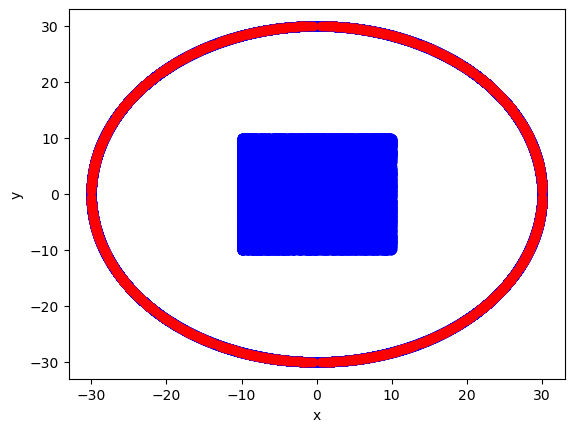

In [322]:
X = set_convex_hull(inside = 10**5 , outside = 10**5)
dupsko = Chan_algorithm(X)

ROZMIAR OTOCZKI: 7
OTOCZKA:
[(-3.14, -29.84), (3.14, -29.84), (29.34, 6.24), (3.14, 29.84), (-27.41, 12.2), (-27.41, -12.2), (-15.0, -25.98)]
(9.27, -28.53)
COUNT: 0
COUNT: 1
2 inf


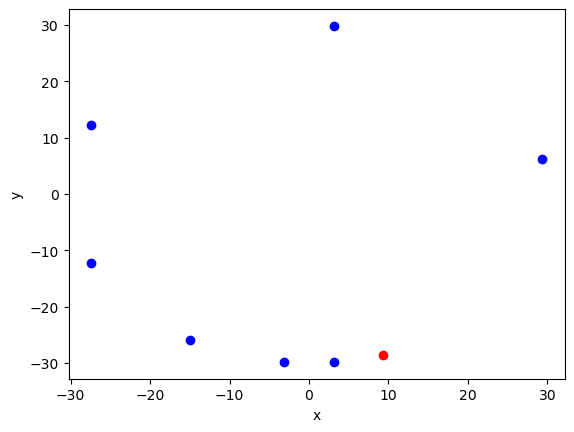

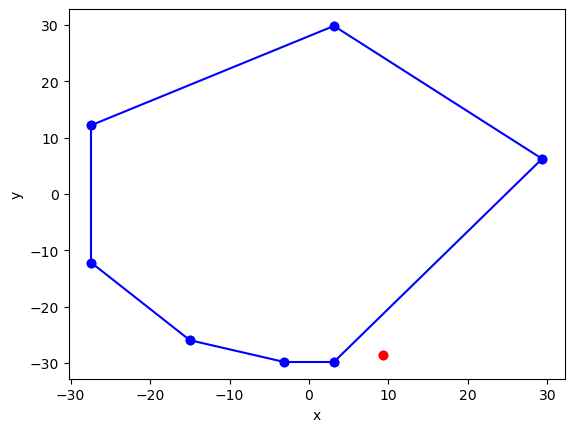

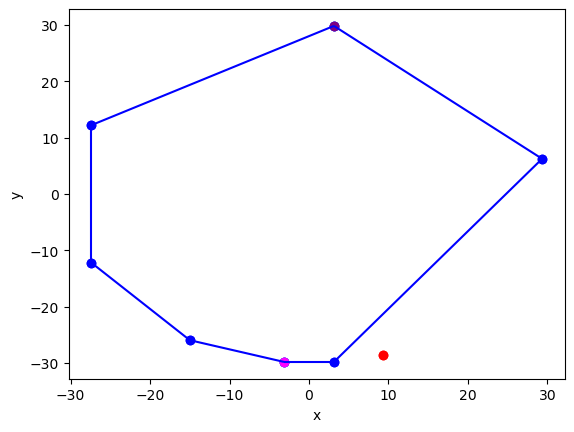

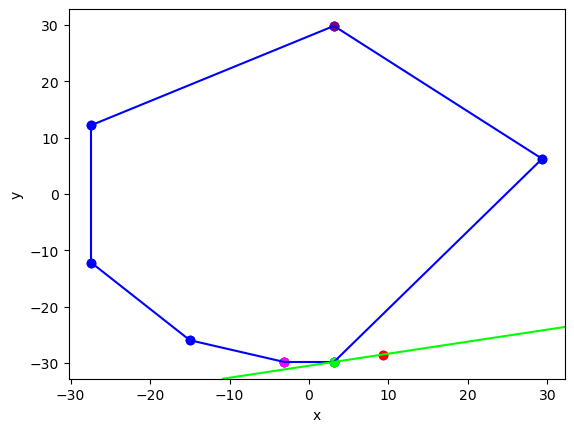

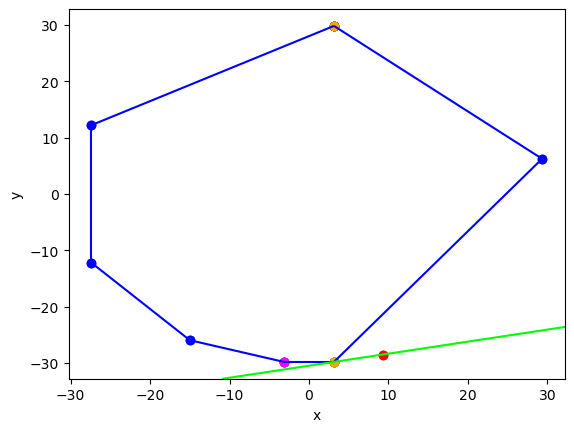

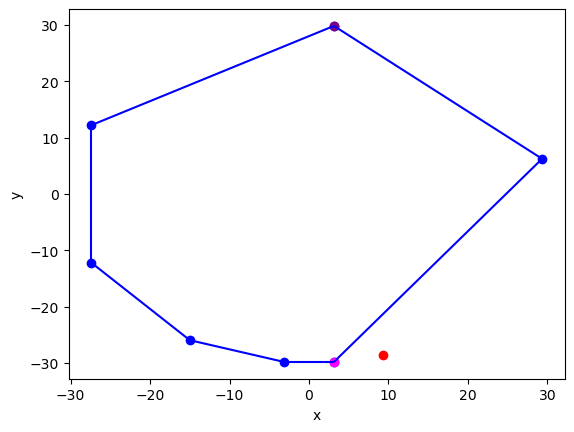

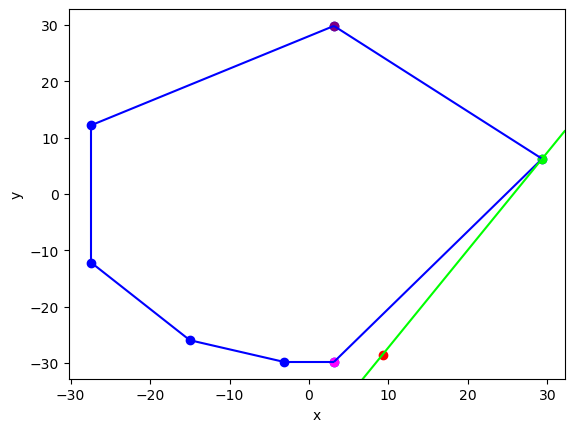

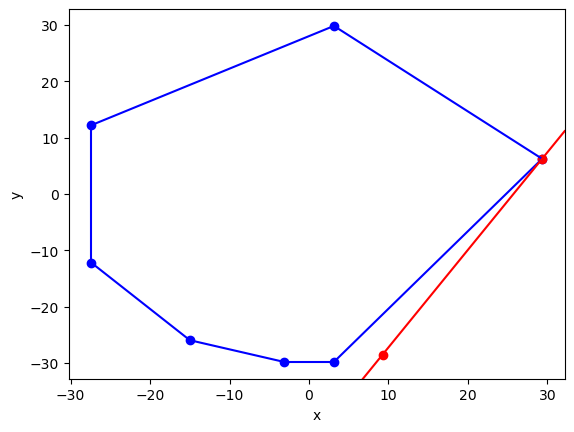

In [286]:
#convex, p1 = even_circle_points((0, 0), 20, 10**5, 12), (30, 15)
#convex = [(15.0, -25.98), (29.34, -6.24), (9.27, 28.53), (-27.41, 12.2), (-29.34, 6.24), (-27.41, -12.2), (-24.27, -17.63)]
#p1 = (24.27, -17.63)

#convex = [(9.27, -28.53), (15.0, -25.98), (20.07, -22.29), (30.0, 0.0), (24.27, 17.63), (15.0, 25.98), (-27.41, 12.2), (-29.34, 6.24), (-29.34, -6.24)]
#p1 = (20.07, -22.29)
convex = [(-3.14, -29.84), (3.14, -29.84), (29.34, 6.24), (3.14, 29.84), (-27.41, 12.2), (-27.41, -12.2), (-15.0, -25.98)]
p1 = (9.27, -28.53)
#n = 30
#div = random.randint(5, 14)
#div = len(convex)//3
#print(div)
new_convex = convex
#for i in range(div, len(convex)):
    #new_convex.append(convex[i])
#for i in range(div):
    #new_convex.append(convex[i])
vis3 = Visualizer()
vis3.add_point(new_convex, color = "blue")
vis3.add_point([p1], color = "red" )
vis3.show()
l, r = bin_search(p1, new_convex, vis3, True)
print(l, r)
vis3.clear()
if(r == float('inf') and l != float('inf')):
    vis3.add_point(new_convex, color = "blue")
    add_perimeter(new_convex, vis3, "blue")
    vis3.add_point([p1, new_convex[l]], color = "red")
    vis3.add_line([(p1, new_convex[l])], color = "red")
    vis3.show()